In [214]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set()

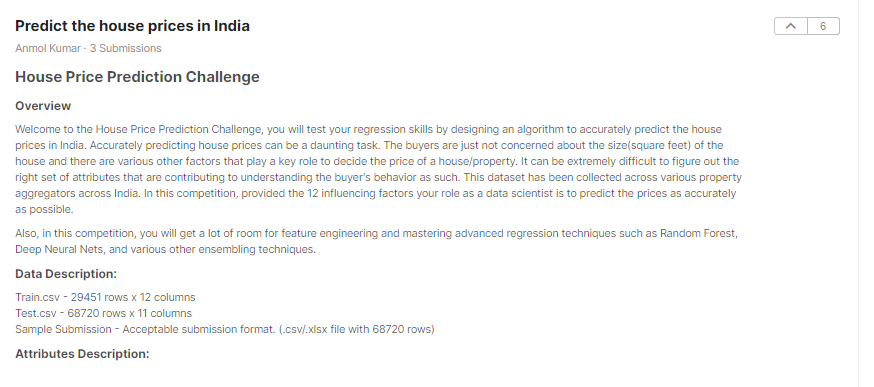

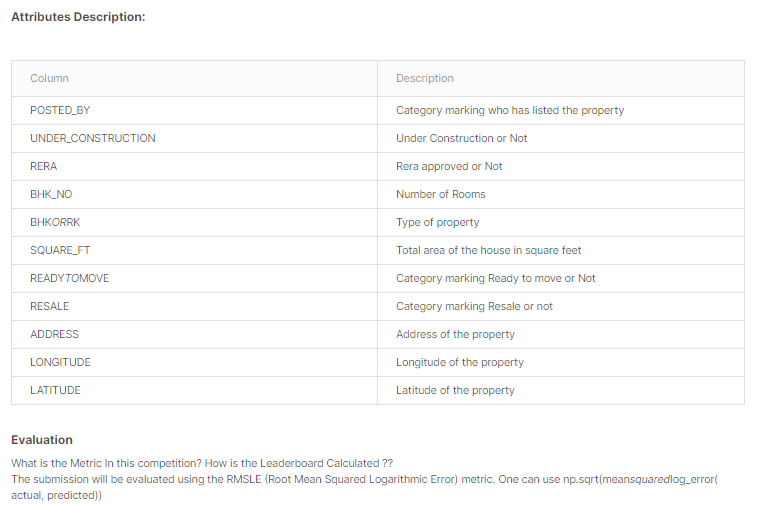

In [215]:
df=pd.read_csv('train.csv')


In [216]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [218]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


#### If we see BHK_NO it has max value 20, which is not possible 
#### In price we can see 3000 lac which seem to be outlier

In [219]:
# taking out city from address 

In [220]:
df['CITY']=df['ADDRESS'].apply(lambda x :x.split(',')[1])

In [221]:
df.drop('ADDRESS',1,inplace=True)

In [222]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,Kolkata


In [223]:
df.isnull().sum(axis=0)

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
CITY                     0
dtype: int64

### lets see unique and value counts  in different columns

In [224]:
df.nunique()

POSTED_BY                    3
UNDER_CONSTRUCTION           2
RERA                         2
BHK_NO.                     16
BHK_OR_RK                    2
SQUARE_FT                19561
READY_TO_MOVE                2
RESALE                       2
LONGITUDE                 4087
LATITUDE                  4078
TARGET(PRICE_IN_LACS)     1172
CITY                       433
dtype: int64

let's check value count of colums which have less than 20 value

In [225]:
col_less_20=['POSTED_BY','UNDER_CONSTRUCTION','BHK_NO.','BHK_OR_RK','READY_TO_MOVE','RESALE','CITY']


for col in col_less_20:
    print(df[col].value_counts())
    print("----------------------------------------------")

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64
----------------------------------------------
0    24157
1     5294
Name: UNDER_CONSTRUCTION, dtype: int64
----------------------------------------------
2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
15        4
10        4
20        4
12        3
9         3
13        1
11        1
17        1
Name: BHK_NO., dtype: int64
----------------------------------------------
BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64
----------------------------------------------
1    24157
0     5294
Name: READY_TO_MOVE, dtype: int64
----------------------------------------------
1    27377
0     2074
Name: RESALE, dtype: int64
----------------------------------------------
Bangalore                4319
Lalitpur                 2987
Mumbai                   2020
Pune                     1984
Noida                    1765
                         ... 
 Sirsi Bhankrot

In [226]:
# we have so much city we can make less occuring city as Other and maharastra as other

In [227]:
df['CITY'].value_counts()[:11]

Bangalore      4319
Lalitpur       2987
Mumbai         2020
Pune           1984
Noida          1765
Kolkata        1699
Maharashtra    1575
Chennai        1231
Ghaziabad      1085
Jaipur          957
Chandigarh      696
Name: CITY, dtype: int64

In [228]:
# we can keep top 10 and fo reaming wi will make other

In [229]:
col_dict_city=dict(df['CITY'].value_counts()<600)

In [230]:
for i in col_dict_city.keys():
    if col_dict_city[i]==True:
        df['CITY']=df['CITY'].replace(i,'Other')
# maharastra is not a city       
df['CITY']=df['CITY'].replace('Maharashtra','Other')

 we have also som many BHK we can make 5+ or 4+ bhk 

In [231]:
df['BHK_NO.'].value_counts()

2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
15        4
10        4
20        4
12        3
9         3
13        1
11        1
17        1
Name: BHK_NO., dtype: int64

We can see after 4 bhk number are decreased have so many value we can do that make '4+'

In [232]:
# converting dtype of BHK_NO to categorical

df['BHK_NO.']=df['BHK_NO.'].astype('O')

In [233]:
col_dict_bhk=dict(df['BHK_NO.'].value_counts()<1000)

In [234]:
for i in col_dict_bhk.keys():
    if col_dict_bhk[i]==True:
        df['BHK_NO.']=df['BHK_NO.'].replace(i,'4+')

In [235]:
df['BHK_NO.'].value_counts()

2     13324
3     10546
1      3574
4      1723
4+      284
Name: BHK_NO., dtype: int64

In [236]:
df['CITY'].value_counts()

Other         10059
Bangalore      4319
Lalitpur       2987
Mumbai         2020
Pune           1984
Noida          1765
Kolkata        1699
Chennai        1231
Ghaziabad      1085
Jaipur          957
Chandigarh      696
Faridabad       649
Name: CITY, dtype: int64

In [237]:
#dropping BHK or RK as highly skewness
df.drop('BHK_OR_RK',1,inplace=True)

In [238]:
# with the help of sqft and price we can drive another feature price per sqft
df['Price_per_sqft(lac)']=df['TARGET(PRICE_IN_LACS)']/df['SQUARE_FT']

In [239]:
df.nunique()

POSTED_BY                    3
UNDER_CONSTRUCTION           2
RERA                         2
BHK_NO.                      5
SQUARE_FT                19561
READY_TO_MOVE                2
RESALE                       2
LONGITUDE                 4087
LATITUDE                  4078
TARGET(PRICE_IN_LACS)     1172
CITY                        12
Price_per_sqft(lac)      21332
dtype: int64

### We r good to go we for model building but before that let quickly do some EDA try to understand data

### EDA 

In [240]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,Price_per_sqft(lac)
0,Owner,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,Bangalore,0.04230
1,Dealer,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,Other,0.04000
2,Owner,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,Bangalore,0.04608
3,Owner,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,Ghaziabad,0.06721
4,Dealer,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,Kolkata,0.06056


<AxesSubplot:xlabel='LATITUDE', ylabel='Density'>

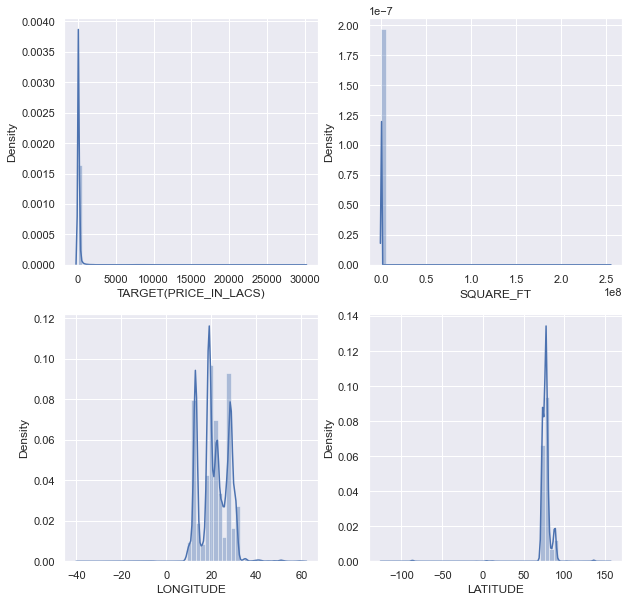

In [241]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['TARGET(PRICE_IN_LACS)'])

plt.subplot(2,2,2)
sns.distplot(df['SQUARE_FT'])
plt.subplot(2,2,3)
sns.distplot(df['LONGITUDE'])
plt.subplot(2,2,4)
sns.distplot(df['LATITUDE'])

we can say that we have outliers in target and sq ft let check them and treat them

If we see longitude and latitude, in longitude we have 3 peak in 0-40 which , in latitude 50-100 which means we have major city in between these

In [242]:
# With the help of interquantile technique and soft boundary so we don't tempored much data we removed outliers


cols = ['SQUARE_FT', 'TARGET(PRICE_IN_LACS)'] # one or more

Q1 = df[cols].quantile(0.05)
Q3 = df[cols].quantile(0.90)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:xlabel='LATITUDE', ylabel='Density'>

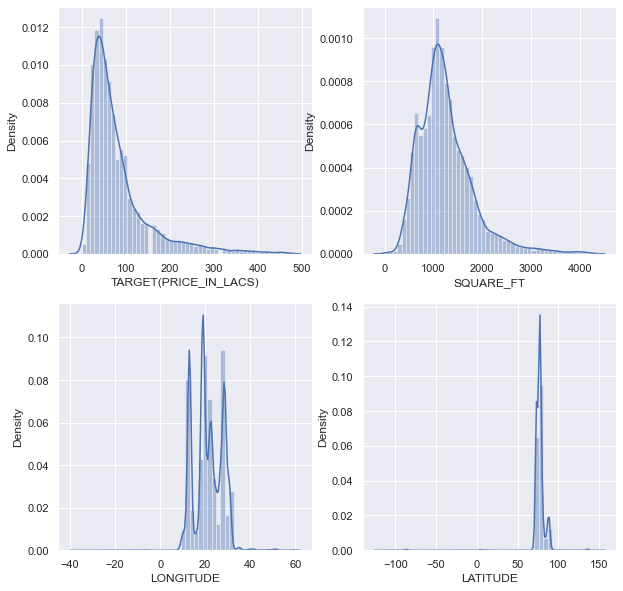

In [243]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['TARGET(PRICE_IN_LACS)'])

plt.subplot(2,2,2)
sns.distplot(df['SQUARE_FT'])
plt.subplot(2,2,3)
sns.distplot(df['LONGITUDE'])
plt.subplot(2,2,4)
sns.distplot(df['LATITUDE'])

Now we can see clear picture :
We have more house between prices between 10 100 lac
more houses between 1000 to 2000 sq ft

In [244]:
# lets see outliers 

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='SQUARE_FT'>

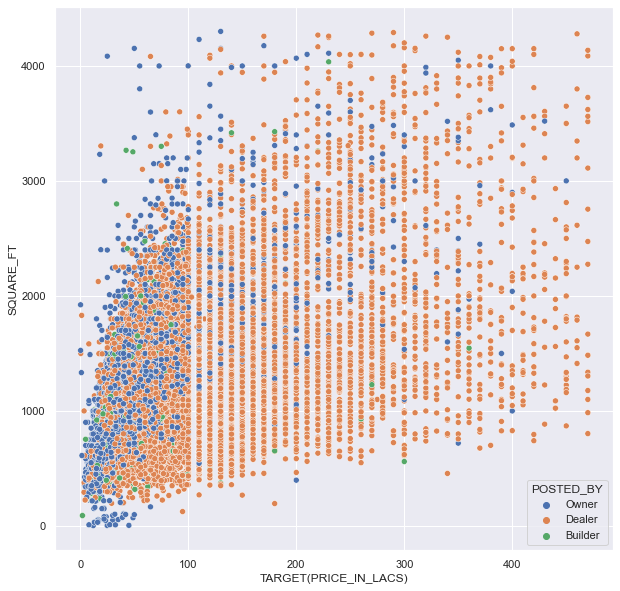

In [245]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='TARGET(PRICE_IN_LACS)',y='SQUARE_FT',hue='POSTED_BY',data=df)

We can say that dealer sell property most costlier then owner and builder <br>
becaouse if we see blue they are highly dense between 0-100 but decrease after that we can see only orange

If we see highly dense in price 0 to 100 then decrease <br>

and we don't have any outliers

In [246]:
# let see house price wrt city

<AxesSubplot:xlabel='CITY', ylabel='TARGET(PRICE_IN_LACS)'>

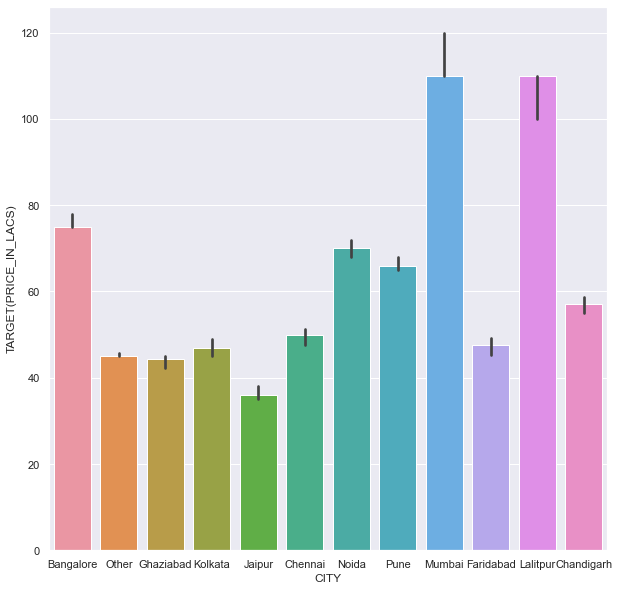

In [247]:
plt.figure(figsize=(10,10))
sns.barplot(x='CITY',y='TARGET(PRICE_IN_LACS)',data=df,estimator=np.median)

we can see that in mumbai we need to pay more <br>
In second we have lalitpur but its so strange as lalitpur is not metro city or crowded city <br>

<AxesSubplot:xlabel='CITY', ylabel='TARGET(PRICE_IN_LACS)'>

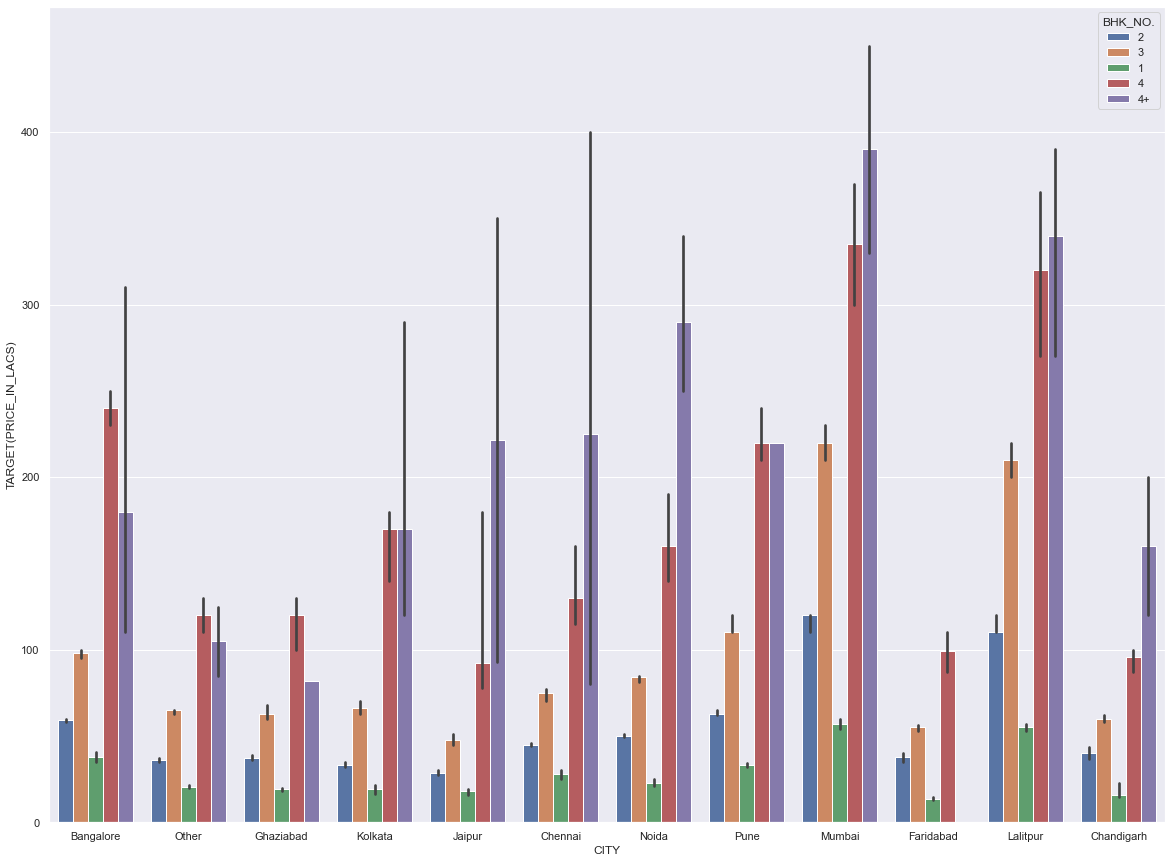

In [249]:
plt.figure(figsize=(20,15))
sns.barplot(x='CITY',y='TARGET(PRICE_IN_LACS)',hue='BHK_NO.',data=df,estimator=np.median)

 OK, higher the number of bhk more price u need to pay


<AxesSubplot:xlabel='CITY', ylabel='SQUARE_FT'>

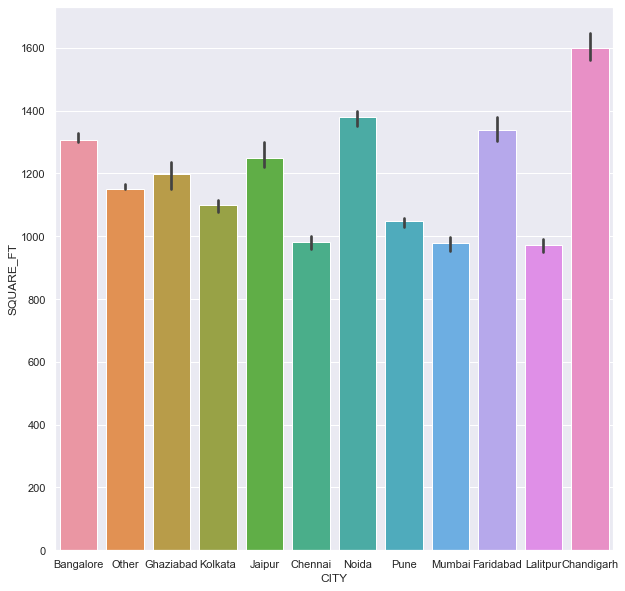

In [250]:
plt.figure(figsize=(10,10))
sns.barplot(x='CITY',y='SQUARE_FT',data=df,estimator=np.median)

<AxesSubplot:xlabel='CITY', ylabel='SQUARE_FT'>

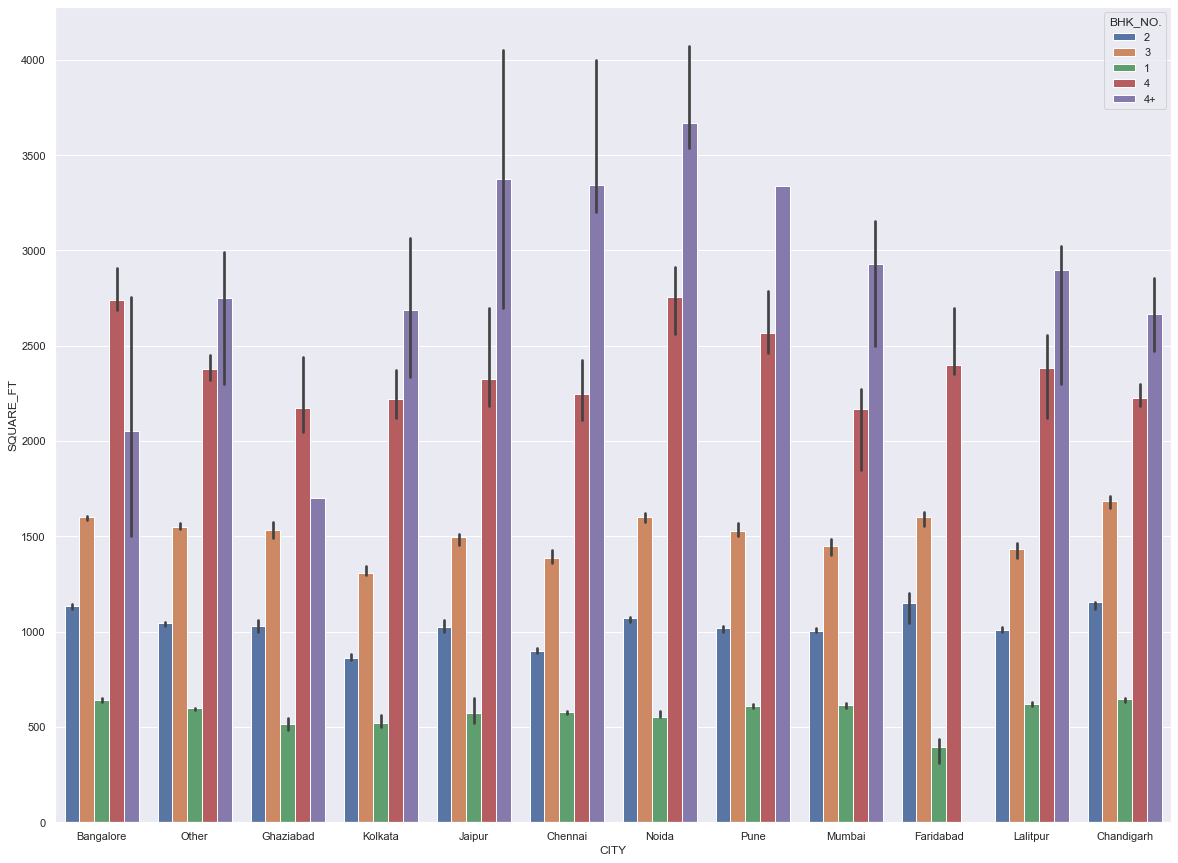

In [251]:
plt.figure(figsize=(20,15))
sns.barplot(x='CITY',y='SQUARE_FT',hue='BHK_NO.',data=df,estimator=np.median)

If we closely observe mumbai and other city like bangalore etc, we will see we need to pay high amount and we get less area. <br>
Kolkatta and noida is good place to invest as you will need to pay less in this city and you will get more area

<AxesSubplot:xlabel='CITY', ylabel='Price_per_sqft(lac)'>

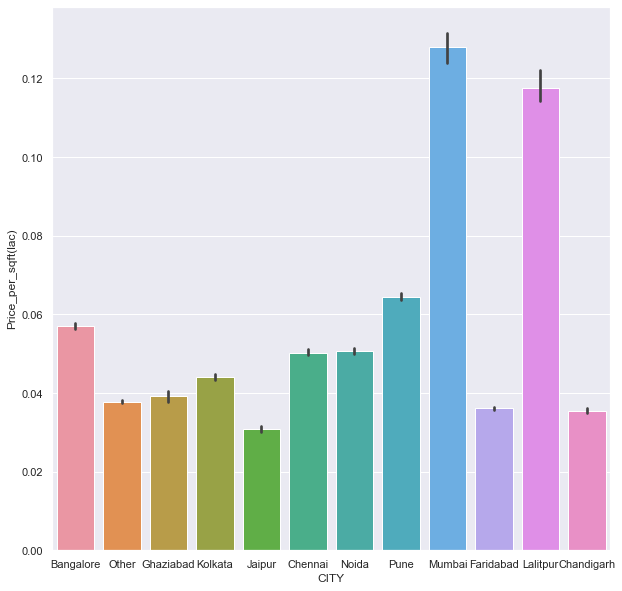

In [252]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['CITY'],y=df['Price_per_sqft(lac)'],estimator=np.median)

So we can say that Mumbai has high land price and  which impact on size of land people buy.

<br > something wrong in lalitpur

<AxesSubplot:xlabel='UNDER_CONSTRUCTION', ylabel='TARGET(PRICE_IN_LACS)'>

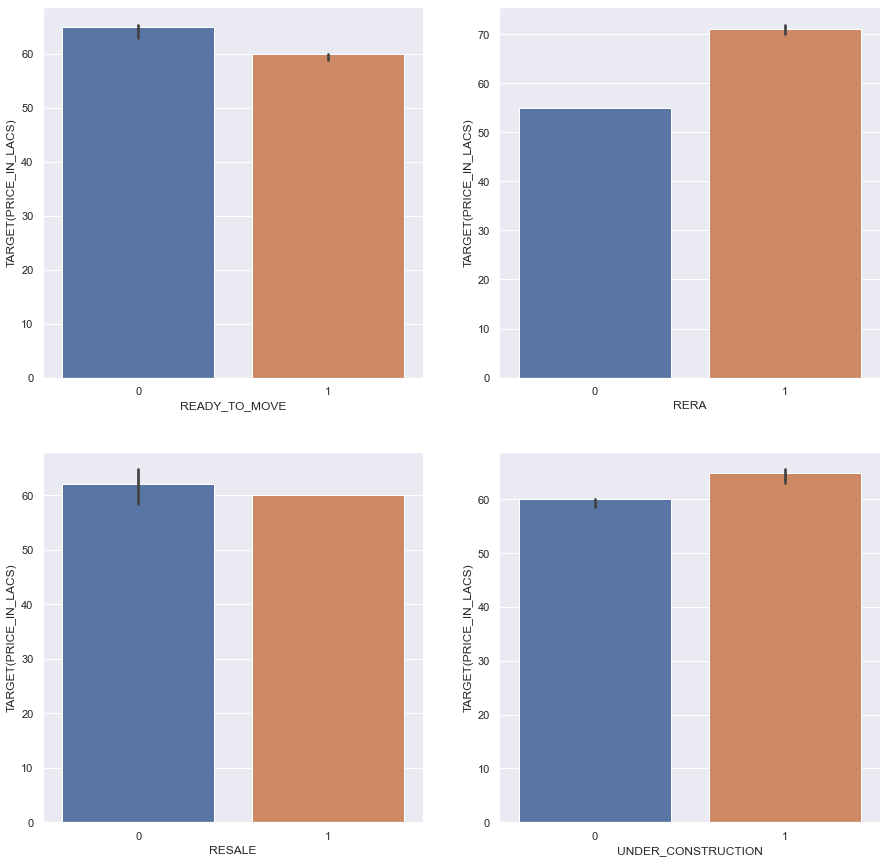

In [277]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.barplot('READY_TO_MOVE','TARGET(PRICE_IN_LACS)',data=df,estimator=np.median)

plt.subplot(2,2,2)
sns.barplot('RERA','TARGET(PRICE_IN_LACS)',data=df,estimator=np.median)
plt.subplot(2,2,3)
sns.barplot('RESALE','TARGET(PRICE_IN_LACS)',data=df,estimator=np.median)
plt.subplot(2,2,4)
sns.barplot('UNDER_CONSTRUCTION','TARGET(PRICE_IN_LACS)',data=df,estimator=np.median)

Ready to move are slighlly costlier then not ready to move <br>
RERA registred are costlier property <br>
Rsale property is cheaper but with not much margin <br>
Under construction company is cheaper<br>

# let's try to figure out whats wrong in lalitpur

In [254]:
# we will try to compare with mumbai,bangalore

In [255]:
df_lalit=df[df['CITY']=='Lalitpur']

In [256]:
df_mumbai=df[df['CITY']=='Mumbai']

In [257]:
df_bang=df[df['CITY']=='Bangalore']

In [258]:
df_lalit.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,Price_per_sqft(lac)
33,Dealer,1,1,1,864.067439,0,1,19.180000,72.96333,82.0,Lalitpur,0.09490
44,Dealer,0,0,2,1026.694045,1,1,19.014858,72.86620,220.0,Lalitpur,0.21428
47,Dealer,0,0,1,475.010326,1,1,24.690280,78.41889,46.0,Lalitpur,0.09684
48,Builder,1,1,1,301.917116,0,0,24.690280,78.41889,26.3,Lalitpur,0.08711
52,Dealer,1,1,1,420.616689,0,1,19.048403,72.88731,130.0,Lalitpur,0.30907


In [259]:
df_mumbai.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,Price_per_sqft(lac)
23,Dealer,0,0,1,630.000630,1,1,19.054440,72.840560,300.0,Mumbai,0.47619
43,Dealer,0,1,3,1274.924779,1,1,22.803593,83.755013,250.0,Mumbai,0.19609
66,Dealer,0,1,3,1038.883942,1,1,19.120000,72.910000,280.0,Mumbai,0.26952
84,Dealer,0,1,2,1004.932182,1,1,18.966114,73.148278,81.5,Mumbai,0.08110
131,Dealer,0,1,2,1294.016156,1,1,19.128324,72.825408,330.0,Mumbai,0.25502


In [260]:
df_bang.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,Price_per_sqft(lac)
0,Owner,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,Bangalore,0.04230
2,Owner,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,Bangalore,0.04608
8,Dealer,0,1,2,1040.000000,1,1,13.054202,77.674002,41.6,Bangalore,0.04000
11,Dealer,0,0,2,1333.010179,1,1,13.040340,77.591347,110.0,Bangalore,0.08252
12,Owner,0,0,2,927.177902,1,1,12.969910,77.597960,48.0,Bangalore,0.05177


In [261]:
df_lalit.nunique()

POSTED_BY                   3
UNDER_CONSTRUCTION          2
RERA                        2
BHK_NO.                     5
SQUARE_FT                2383
READY_TO_MOVE               2
RESALE                      2
LONGITUDE                 267
LATITUDE                  267
TARGET(PRICE_IN_LACS)     370
CITY                        1
Price_per_sqft(lac)      2479
dtype: int64

In [262]:
df_lalit.describe([.99])

,UNDER_CONSTRUCTION,RERA,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Price_per_sqft(lac)
count,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000
mean,0.278724,0.468286,1003.074585,0.721276,0.893440,22.188313,75.709117,134.767343,0.134960
std,0.448453,0.499084,447.506844,0.448453,0.308609,3.486774,2.941450,93.963369,0.075546
min,0.000000,0.000000,196.942082,0.000000,0.000000,12.916680,70.789479,3.500000,0.003500
50%,0.000000,0.000000,970.616783,1.000000,1.000000,21.052588,76.621298,110.000000,0.117640
99%,1.000000,1.000000,2532.613496,1.000000,1.000000,30.723966,85.325643,430.000000,0.371004
max,1.000000,1.000000,4082.914573,1.000000,1.000000,33.450000,88.433715,470.000000,0.585270


<AxesSubplot:xlabel='SQUARE_FT', ylabel='Density'>

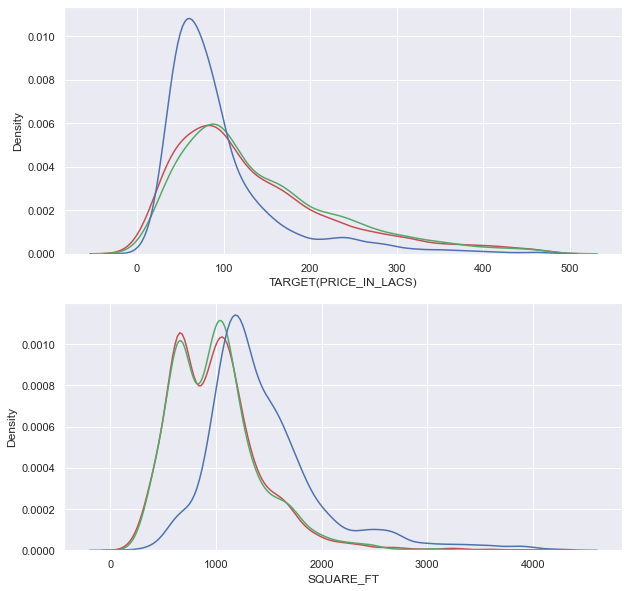

In [263]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.distplot(df_lalit['TARGET(PRICE_IN_LACS)'],hist=False,color='r')
sns.distplot(df_mumbai['TARGET(PRICE_IN_LACS)'],hist=False,color='g')
sns.distplot(df_bang['TARGET(PRICE_IN_LACS)'],hist=False,color='b')

plt.subplot(2,1,2)
sns.distplot(df_lalit['SQUARE_FT'],hist=False,color='r')
sns.distplot(df_mumbai['SQUARE_FT'],hist=False,color='g')
sns.distplot(df_bang['SQUARE_FT'],hist=False,color='b')


Mumbai and lalitpur is showing almost same distribution,which is quite strnge, maybe data is not feasible for lalitpur or more analysis required

# Conclusion Of analysis:-

Dealer sell property most costlier then owner and builder <br>

IN major place we will see property price in between  10-100. <br>

Mumbai is most costlier city wrt price, land price per sqft <br> 

price increase with BHK <br>

Ready to move are slighlly costlier then not ready to move <br>

RERA registred are costlier property <br>

Rsale property is cheaper but with not much margin <br>

Under construction company is cheaper<br>


NameError: name 'to_csv' is not defined

In [284]:
df.to_csv('final_df.csv')